In [13]:
from codes.python import load_database,ECG_denoising
from codes.python import QRS_detector
import numpy as np
from scipy import signal
from scipy.signal import savgol_filter
import operator
from numpy import array
import sys
import csv
import os
import matplotlib.pyplot as plt
import wfdb
from wfdb import processing, plot
from codes.python import heartbeat_segmentation as shs
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import pandas as pd
from codes.python import curve_smoothing 
import pywt
from biosppy.signals import ecg
from sklearn import metrics
#import waipy
import operator


In [2]:
mitdb = load_database.load_mitdb()
mitdb.segment_beats()

C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/100
C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/csv/100.csv
C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/csv/100.txt
C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/p_t_wave/100pt.csv
C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/101
C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/csv/101.csv
C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/csv/101.txt
C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/p_t_wave/101pt.csv
C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/102
C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/csv/102.csv
C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/csv/102.txt
C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/p_t_wave/102pt

C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/csv/201.txt
C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/p_t_wave/201pt.csv
C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/202
C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/csv/202.csv
C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/csv/202.txt
C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/p_t_wave/202pt.csv
C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/203
C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/csv/203.csv
C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/csv/203.txt
C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/p_t_wave/203pt.csv
C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/205
C:\Users\chont\OneDrive\Documents\GitHub\ECGdataAnalysis/database/mitdb/csv/205

Filtered MLII records from : 102
start segmenting MLII.
Finished segmenting MLII.
Segmenting record 102 completes.
Start segmenting records: 103
Filtered MLII records from : 103
start segmenting MLII.
Finished segmenting MLII.
Segmenting record 103 completes.
Start segmenting records: 104
Filtered MLII records from : 104
start segmenting MLII.
Finished segmenting MLII.
Segmenting record 104 completes.
Start segmenting records: 105
Filtered MLII records from : 105
start segmenting MLII.
Finished segmenting MLII.
Segmenting record 105 completes.
Start segmenting records: 106
Filtered MLII records from : 106
start segmenting MLII.
Finished segmenting MLII.
Segmenting record 106 completes.
Start segmenting records: 107
Filtered MLII records from : 107
start segmenting MLII.
Finished segmenting MLII.
Segmenting record 107 completes.
Start segmenting records: 108
Filtered MLII records from : 108
start segmenting MLII.
Finished segmenting MLII.
Segmenting record 108 completes.
Start segmentin

In [8]:
mitdb

In [30]:
pwa = []
for p in range(0, 1):#len(mitdb.patient_records[0])):
    patient = mitdb.patient_records[p]
    
    pwaves = np.asarray(patient.annotated_p_waves_pos)
   # twaves = patient.annotated_t_waves_pos
    
    r_pos_1 = patient.segmented_R_pos[0]
    first_pos = 0
    pre_r = list(range(first_pos, r_pos_1))
    index = np.where((pwaves > first_pos) & (pwaves < r_pos_1))
   
    
    pwa.append(pwaves[index])
    
    for r in range(1, len(patient.segmented_R_pos)-1):
        r_pos_first = patient.segmented_R_pos[r]
        r_pos_last = patient.segmented_R_pos[r+1]
        index = np.where((pwaves > r_pos_first) & (pwaves < r_pos_last))
       
        pwa.append(pwaves[index])
    
    r_pos_first=patient.segmented_R_pos[len(patient.segmented_R_pos)-1]
    last_pos = len(patient.filtered_MLII)
    
    index = np.where((pwaves > r_pos_first) & (pwaves < last_pos))
       
    pwa.append(pwaves[index])
    
        

In [4]:
mit100 = mitdb.patient_records[0]



In [39]:
pwa = [print(pwa[i]) for i in range( 0,len(pwa))]

[311.]
[885.]
[1168.]
[1456.]
[1747.]
[1983.]
[2339.]
[2643.]
[2938.]
[3223.]
[3499.]
[3796.]
[4107.]
[4403.]
[4701.]
[4999.]
[5285.]
[5578.]
[5856.]
[6147.]
[6462.]
[6759.]
[7041.]
[7331.]
[7608.]
[7889.]
[8182.]
[8481.]
[8772.]
[9077.]
[9374.]
[9655.]
[9936.]
[10223.]
[10524.]
[10828.]
[11128.]
[11419.]
[11722.]
[12002.]
[12290.]
[12579.]
[12884.]
[13204.]
[13501.]
[13786.]
[14068.]
[14362.]
[14652.]
[14943.]
[15248.]
[15548.]
[15838.]
[16123.]
[16407.]
[16694.]
[16992.]
[17301.]
[17594.]
[17883.]
[18164.]
[18450.]
[18731.]
[19020.]
[19319.]
[19627.]
[19928.]
[20210.]
[20492.]
[20775.]
[21070.]
[21362.]
[21665.]
[21962.]
[22262.]
[22543.]
[22825.]
[23101.]
[23387.]
[23691.]
[23990.]
[24283.]
[24565.]
[24851.]
[25134.]
[25421.]
[25715.]
[26021.]
[26321.]
[26615.]
[26893.]
[27177.]
[27475.]
[27769.]
[28069.]
[28365.]
[28663.]
[28952.]
[29233.]
[29522.]
[29812.]
[30118.]
[30425.]
[30717.]
[31004.]
[31286.]
[31572.]
[31862.]
[32159.]
[32462.]
[32777.]
[33067.]
[33344.]
[33629.]
[33915.]


[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[635630.]
[635910.]
[636180.]
[636470.]
[636760.]
[637050.]
[637340.]
[637640.]
[637940.]
[638220.]
[638500.]
[638780.]
[639080.]
[639380.]
[639680.]
[639980.]
[640270.]
[640550.]
[640850.]
[641120.]
[641410.]
[641710.]
[642000.]
[642280.]
[642560.]
[642820.]
[643100.]
[643370.]
[643660.]
[643940.]
[]
[644490.]
[644750.]
[]
[]
[645530.]
[645800.]
[646070.]
[646330.]
[646600.]
[646870.]
[]
[]
[]
[647880.]
[]
[648420.]
[]
[]
[]
[]
[]
[]


In [5]:
pwaves = mit100.annotated_p_waves_pos
twaves = mit100.annotated_t_waves_pos


In [60]:
p_waves

[560, 1420]

In [6]:
len(pwaves)
len(twaves)

2448

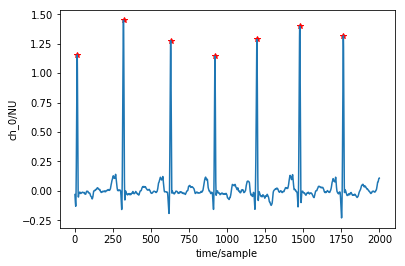

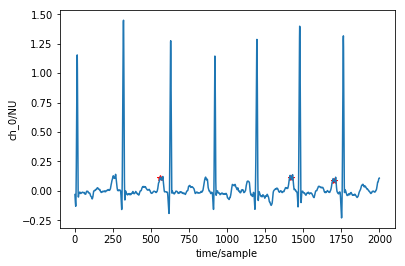

In [69]:
r_pos = np.asarray(mit100.segmented_R_pos)
index = np.where((r_pos > 514000) & (r_pos < 516000))
r_pos = np.asarray(r_pos[index])
r_waves = np.asarray([514015-514000, 514319-514000, 514629-514000, 514919-514000, 515195-514000, 515476-514000, 515763-514000])
p_waves = np.asarray([514560-514000, 515420-514000, 515700-514000])#, 500550-500000, 500780-500000])


filtered_np100 = savgol_filter(mit100.filtered_MLII[0:1000],51,7)

p_waves = [int(b) for b in p_waves]
#p_waves = list([210, 400])
p_wave = np.asarray(p_waves)
wfdb.plot_items(signal=mit100.filtered_MLII[514000:516000], ann_samp=[r_waves])

wfdb.plot_items(signal=mit100.filtered_MLII[514000:516000], ann_samp=[p_wave])
#wfdb.plot_items(signal=filtered_np100)#, ann_samp=[p_wave])



In [64]:
r_pos

array([514015, 514319, 514629, 514919, 515195, 515476, 515763])

In [11]:
p_waves = []
t_waves = []
averages_p = []
averages_t = []
diffs_p = []
diffs_t = []
max_diff = 1000
for i in mitdb.patient_records:
    diffs = []
    p_waves.extend(i.annotated_p_waves_pos)
    t_waves.extend(i.annotated_t_waves_pos)
    for j in range(0,len(i.annotated_p_waves_pos)-1):
        diff=i.annotated_p_waves_pos[j+1] - i.annotated_p_waves_pos[j]
        if(diff <= max_diff):
            diffs.append(diff)
        
    diffs_p.extend(diffs)
    averages = round(average(diffs),2)
    averages_p.append(averages)
    
    diffs = []
    for j in range(0,len(i.annotated_t_waves_pos)-1):
        diff=i.annotated_t_waves_pos[j+1] - i.annotated_t_waves_pos[j]
        if(diff <= max_diff):
            diffs.append(diff)
    diffs_t.extend(diffs)
    averages = round(average(diffs),2)
    averages_t.append(averages)
    #averages_p.append(round(average(p_waves),2))
    #averages_t.append(round(average(t_wavess),2))
    
    
p_waves = [int(b) for b in p_waves]
t_waves = [int(t) for t in t_waves]

In [12]:
r_peaks = []

for i in mitdb.patient_records:
    
    r_peaks.extend(i.segmented_R_pos)
   
    
    


In [13]:
len(r_peaks)

112543

In [14]:

p_all_diffs = []

for i in range(0, len(p_waves)-1):
    
        
    diff=p_waves[i+1] - p_waves[i]
        
    p_all_diffs.append(diff)



t_all_diffs = []

for i in range(0, len(t_waves)-1):
    
        
    diff=t_waves[i+1] - t_waves[i]
        
    t_all_diffs.append(diff)
 

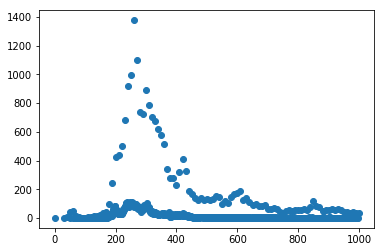

In [15]:
x ,y  = np.unique(diffs_p, return_counts=True) # counting occurrence of each loan
plt.scatter(x,y)



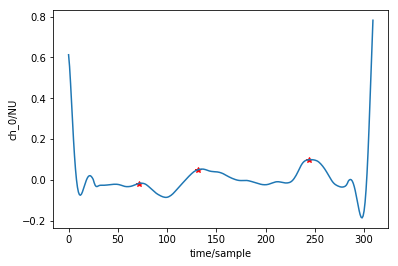

{'plateau_sizes': array([1, 1, 1], dtype=int64),
 'left_edges': array([ 71, 131, 244], dtype=int64),
 'right_edges': array([ 71, 131, 244], dtype=int64),
 'peak_heights': array([-0.01139368,  0.05664954,  0.11212205]),
 'prominences': array([0.02562751, 0.08226536, 0.19679668]),
 'left_bases': array([61, 96, 96], dtype=int64),
 'right_bases': array([ 96, 199, 299], dtype=int64),
 'widths': array([ 9.28088962, 39.68761232, 33.40787386]),
 'width_heights': array([-0.02420744,  0.01551686,  0.01372371]),
 'left_ips': array([ 67.97503289, 123.16882712, 229.89901822]),
 'right_ips': array([ 77.25592251, 162.85643944, 263.30689208])}

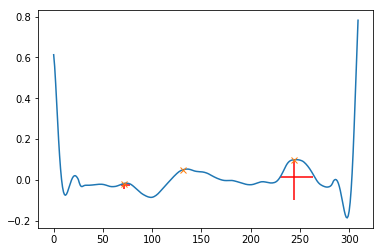

In [16]:
sig = mit100.MLII[mit100.segmented_R_pos[2001]:mit100.segmented_R_pos[2002]]
filter_FIR = ECG_denoising.ECG_FIR_filter()

filtered_signal = ECG_denoising.denoising_signal_FIR(sig,filter_FIR)
filtered_np100 = savgol_filter(mit100.filtered_MLII[0:10000],51,7)
savgol_signal = savgol_filter(filtered_signal,51,7)
#peaks = processing.find_peaks(filtered_np100)


peaks = signal.find_peaks_cwt(savgol_signal, np.arange(1, 50))#, max_distances=np.arange(1, 100)/4)

second_peak = 0
if(mit100.filtered_MLII[mit100.segmented_R_pos[1]] > mit100.filtered_MLII[mit100.segmented_R_pos[2]]):
    second_peak = mit100.filtered_MLII[mit100.segmented_R_pos[2]]
else:
    second_peak = mit100.filtered_MLII[mit100.segmented_R_pos[1]]

peaks,properties  = np.asarray(signal.find_peaks(filtered_signal, height=[min(filtered_signal),second_peak-0.05], distance=40,width=[5,100],plateau_size=[0,100] ))#, max_distances=np.arange(1, 100)/4)

left_base = np.asarray(properties["left_bases"])
right_bases = np.asarray(properties["right_bases"])
left_ips = np.asarray(properties["left_ips"])
right_ips = np.asarray(properties["right_ips"])
left_ips = [int(i) for i in left_ips]
right_ips = [int(i) for i in right_ips]

left_ips = np.asarray(left_ips)
right_ips = np.asarray(right_ips)
wfdb.plot_items(signal=savgol_signal, ann_samp=[peaks])

plt.plot(savgol_signal)
plt.plot(peaks, savgol_signal[peaks], "x")
plt.vlines(x=peaks, ymin=savgol_signal[peaks] - properties["prominences"],ymax = savgol_signal[peaks], color = "r1")
plt.hlines(y=properties["width_heights"], xmin=properties["left_ips"],xmax=properties["right_ips"], color = "r1")
properties

#find using cluster.

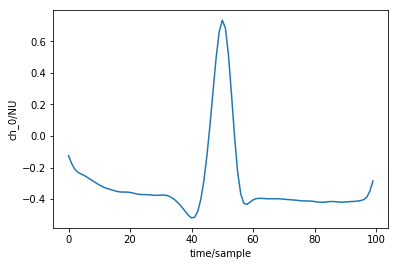

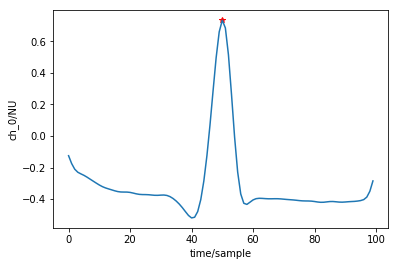

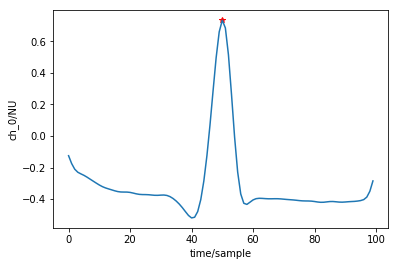

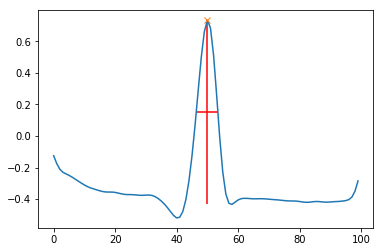

In [17]:
sig = mit100.MLII[mit100.segmented_R_pos[1]-50:mit100.segmented_R_pos[1]+50]

filter_FIR = ECG_denoising.ECG_FIR_filter()

filtered_signal = ECG_denoising.denoising_signal_FIR(sig,filter_FIR)
fitlered100 = filtered_signal
savgol_signal = savgol_filter(filtered_signal,51,7)

wfdb.plot_items(signal=filtered_signal)

peaks,properties = peak_properties_extractor(filtered_signal,height=None, distance=20, width = [5,100], plateau_size=[0,100])
#peaks,properties  = np.asarray(signal.find_peaks(filtered_signal, height=min(filtered_signal), distance=20,width=[5,100],plateau_size=[0,100] ))#, max_distances=np.arange(1, 100)/4)
wfdb.plot_items(signal=filtered_signal,ann_samp=[peaks])

left_base = np.asarray(properties["left_bases"])
right_bases = np.asarray(properties["right_bases"])
left_ips = np.asarray(properties["left_ips"])
right_ips = np.asarray(properties["right_ips"])
left_ips = [int(i) for i in left_ips]
right_ips = [int(i) for i in right_ips]

left_ips = np.asarray(left_ips)
right_ips = np.asarray(right_ips)
wfdb.plot_items(signal=filtered_signal, ann_samp=[peaks])

plt.plot(filtered_signal)
plt.plot(peaks, filtered_signal[peaks], "x")
plt.vlines(x=peaks, ymin=filtered_signal[peaks] - properties["prominences"],ymax = filtered_signal[peaks], color = "r1")
plt.hlines(y=properties["width_heights"], xmin=properties["left_ips"],xmax=properties["right_ips"], color = "r1")

##find R peak using the heighest peak.

In [18]:
mit207 = load_database.load_patient_record("mitdb","207")
mit207.set_segmented_beats_r_pos(winL=100,winR=200)

    

C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/207
C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/csv/207.csv
C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/csv/207.txt
C:\Users\nimch681\Documents\git_projects\ECGdataAnalysis/database/mitdb/p_t_wave/207pt.csv
Start segmenting records: 207
Filtered MLII records from : 207
start segmenting MLII.
Finished segmenting MLII.
Segmenting record 207 completes.


In [19]:
sig = []
peaks = []
properites_list= []
heights = []
durations = []
areas = []
onset = []
offset = []
max_peaks = []
min_peaks = []

for r in mit207.segmented_R_pos:
    
    distance=20
    width = [0,100] 
    plateau_size=[0,100]
    start_point = r-50
    end_point = r+50
   
    if(mit207.filtered_MLII[r] >= 0):
        sig = mit207.filtered_MLII[start_point:end_point]
        height = min(sig)   
        peak,properties = peak_properties_extractor(sig,height=height, distance=distance, width = width, plateau_size=plateau_size)
    else:
        sig = -mit207.filtered_MLII[start_point:end_point]
        height = min(sig)   
        peak,properties = peak_properties_extractor(sig,height=height, distance=distance, width = width, plateau_size=plateau_size)
    
    
    savgol_signal = savgol_filter(sig,41,9)
    height = min(savgol_signal)   
    peak_savol,properties_savol = peak_properties_extractor(savgol_signal,height=height, distance=distance, width = width, plateau_size=plateau_size)
    #print()
    #print(peak)
    savgol_signal = savgol_signal[peak_savol]
    #print(peak_savol)
    #print(sig)
    value = max(savgol_signal)
    #print(value)
    if(len(peak_savol) == 0):
        print(len(peak_savol),r)
        print(peak_savol)
    index = np.where(savgol_signal==value)
    #print(index)
    #print(index)
    index = int(index[0])
    
    peak_savol = peak_savol[index]
    peak_savol = point_transform_to_origin(start_point,peak_savol)
    peaks.append(peak_savol)
    left_ips = np.asarray(properties_savol["left_ips"])
    right_ips = np.asarray(properties_savol["right_ips"])
    left_ips = [int(i) for i in left_ips]
    right_ips = [int(i) for i in right_ips]
    
    left_edge = left_ips[index]
    right_edge = right_ips[index]
    
    
    duration = round(peak_duration(time=mit207.time,right_edge=right_edge, left_edge=left_edge,point_from_origin=start_point),3)
    if(duration<0.01):
        min_peaks.append(r)
    durations.append(duration)

   
    #properites_list.append(properties)


[9464, 21826, 22769, 81408, 559055, 570217, 575446, 580129, 582731, 584845]

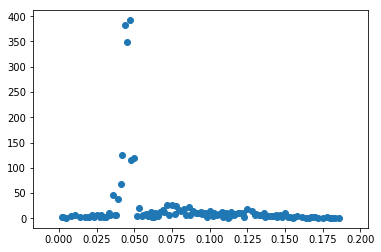

In [20]:
x ,y  = np.unique(durations, return_counts=True) # counting occurrence of each loan
plt.scatter(x,y)

min_peaks

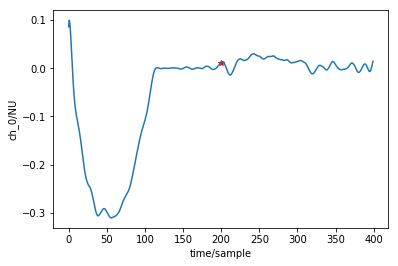

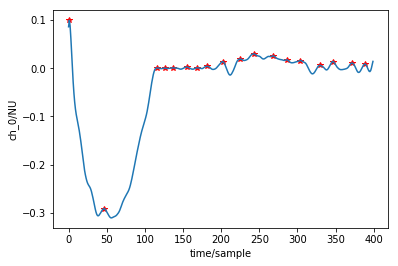

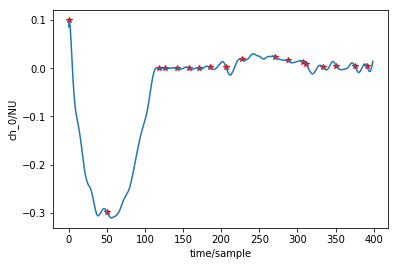

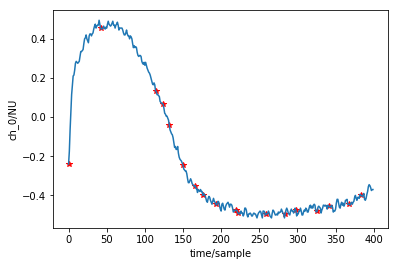

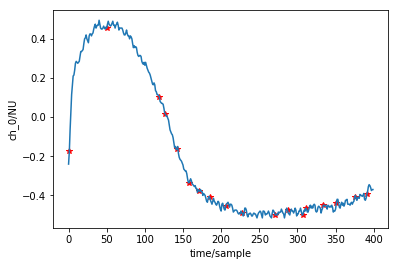

In [21]:
index = list(range(21826-200,21826+200))
sig = -mit207.MLII[21826-200:21826+200]
fitlered100 = mit207.MLII[21826-200:21826+200]
filter_FIR = ECG_denoising.ECG_FIR_filter()


filtered_signal = ECG_denoising.denoising_signal_FIR(sig,filter_FIR)
savgol_signal = savgol_filter(filtered_signal,41,9)
r_pos = np.asarray(shs.r_peak_detector(mit207.filtered_MLII,mit207.annotations,index))
wfdb.plot_items(signal=savgol_signal,ann_samp=[r_pos])

peaks,properties  = np.asarray(signal.find_peaks(savgol_signal, height=min(savgol_signal), distance=10,width=[0,100],plateau_size=[0,100] ))#, max_distances=np.arange(1, 100)/4)
wfdb.plot_items(signal=savgol_signal,ann_samp=[peaks])

left_base = np.asarray(properties["left_bases"])
right_bases = np.asarray(properties["right_bases"])
left_ips = np.asarray(properties["left_ips"])
right_ips = np.asarray(properties["right_ips"])
left_ips = [int(i) for i in left_ips]
right_ips = [int(i) for i in right_ips]

left_ips = np.asarray(left_ips)
right_ips = np.asarray(right_ips)
wfdb.plot_items(signal=savgol_signal,ann_samp=[right_ips])
wfdb.plot_items(signal=fitlered100, ann_samp=[left_ips])
wfdb.plot_items(signal=fitlered100, ann_samp=[right_ips])


## find Q and s using the left and right most index peak from R 

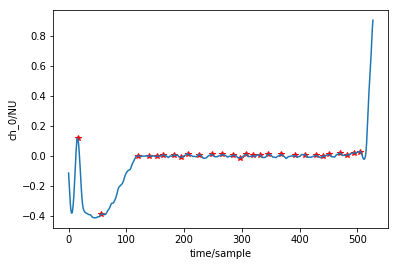

[]

In [22]:

#calculate the off and on set of R-peak first before calculating the the P and T wave. From the onset one can calulate the P and T wave
indexes = list(range(mit207.segmented_R_pos[0]-5,mit207.segmented_R_pos[1]))

#indexes = list(range(0,1500))
mit207_sub = mit207.filtered_MLII[indexes]
r_poses = shs.r_peak_detector(mit207.filtered_MLII,mit207.annotations,indexes)
peaks,properties  = np.asarray(signal.find_peaks(mit207_sub, height=min(mit207_sub), distance=10,width=[0,50],plateau_size=[0,100] ))#, max_distances=np.arange(1, 100)/4)

peak = np.asarray(peaks)
type(peak)
wfdb.plot_items(signal=mit207_sub,ann_samp=[peak])
peak
r_poses

In [23]:
signal = mit100.MLII[mit100.segmented_R_pos[0]:mit100.segmented_R_pos[1]]
noise = np.random.normal(0,0.1,len(signal))
noisy = signal + noise
filter_FIR = ECG_denoising.ECG_FIR_filter()

filtered_signal = ECG_denoising.denoising_signal_FIR(signal,filter_FIR)
filtered_noisy = ECG_denoising.denoising_signal_FIR(noisy,filter_FIR)

savgol_signal = savgol_filter(filtered_signal,51,7)
savgol_noisy = savgol_filter(filtered_noisy,51,7)
savgol_signal = np.array(savgol_signal)
indices = peakutils.indexes(savgol_signal, thres=0.02/max(savgol_signal), min_dist=0.1)

wfdb.plot_items(signal=signal)
wfdb.plot_items(signal=noisy)
wfdb.plot_items(signal=filtered_signal,  ann_samp=[indices])
wfdb.plot_items(signal=filtered_noisy)
wfdb.plot_items(signal=savgol_signal)
wfdb.plot_items(signal=savgol_noisy)

NameError: name 'peakutils' is not defined

In [29]:
len(mit100.segmented_R_pos)

2271